In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models

In [14]:
df=pd.read_csv('C:\_PROJECT_\Breast_cancer\Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [15]:
df.describe(include='all')

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [16]:
y=df.pop('diagnosis')

In [17]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360
std,3.524049,4.301036,24.298981,351.914129,0.014064
min,6.981000,9.710000,43.790000,143.500000,0.052630
25%,11.700000,16.170000,75.170000,420.300000,0.086370
50%,13.370000,18.840000,86.240000,551.100000,0.095870
75%,15.780000,21.800000,104.100000,782.700000,0.105300
max,28.110000,39.280000,188.500000,2501.000000,0.163400


In [19]:
nor=layers.Normalization()
nor.adapt(df)
df=nor(df)
df=np.array(df)

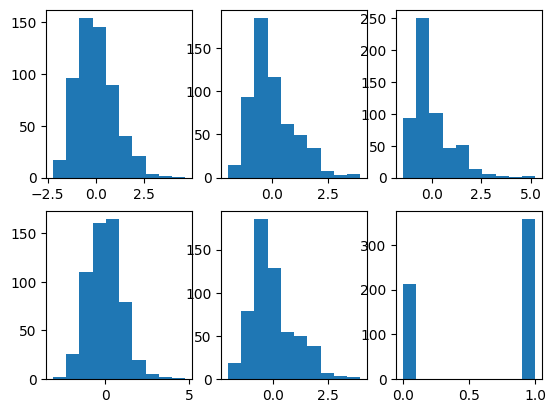

In [57]:

plt.subplot(2, 3, 1)
plt.hist(df[:, 1])
plt.subplot(2, 3, 2)
plt.hist(df[:, 2])
plt.subplot(2, 3, 3)  
plt.hist(df[:, 3]) 
plt.subplot(2, 3, 4)
plt.hist(df[:, 4])
plt.subplot(2, 3, 5)
plt.hist(df[:, 0])
plt.subplot(2, 3, 6)
plt.hist(y)
plt.show()

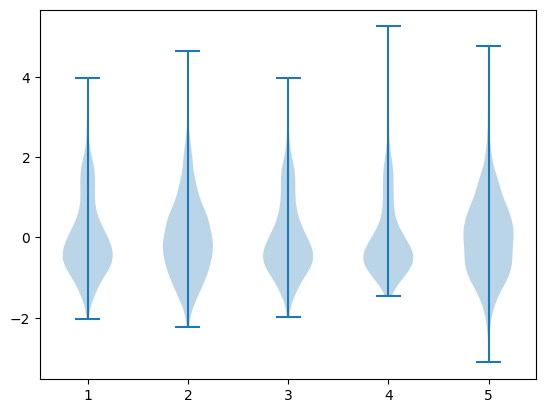

In [20]:
plt.violinplot(df)
plt.plot()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,y)

In [22]:
x_train.shape,x_test.shape

((426, 5), (143, 5))

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(62, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
opt=tf.keras.optimizers.Adamax(learning_rate=0.04)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=15, batch_size=43)

Epoch 1/15
10/10 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.8498
Epoch 2/15
10/10 [==============================] - 0s 1ms/step - loss: 0.1733 - accuracy: 0.9296
Epoch 3/15
10/10 [==============================] - 0s 1ms/step - loss: 0.1624 - accuracy: 0.9343
Epoch 4/15
10/10 [==============================] - 0s 1ms/step - loss: 0.1559 - accuracy: 0.9390
Epoch 5/15
10/10 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9460
Epoch 6/15
10/10 [==============================] - 0s 1ms/step - loss: 0.1515 - accuracy: 0.9437
Epoch 7/15
10/10 [==============================] - 0s 893us/step - loss: 0.1511 - accuracy: 0.9413
Epoch 8/15
10/10 [==============================] - 0s 1ms/step - loss: 0.1505 - accuracy: 0.9390
Epoch 9/15
10/10 [==============================] - 0s 1ms/step - loss: 0.1496 - accuracy: 0.9437
Epoch 10/15
10/10 [==============================] - 0s 1ms/step - loss: 0.1478 - accuracy: 0.9460
Epoch 11/15
10/10

In [25]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

5/5 [==============================] - 0s 2ms/step - loss: 0.1281 - accuracy: 0.9371
Test Loss: 0.1281
Test Accuracy: 0.9371
